In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# 결정트리 의 get_human_dataset()을 부른다.

def get_human_dataset():
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당.
    feature_name_df= pd.read_csv('./human_activity/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])
    
    # DataFrame에 feature명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    # feature_name_df.[:,1] => column_name 컬럼에 해당하는 모든 데이터.
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습피쳐 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩.
    # 컬럼명은 feature_name 적용.
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test= pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


In [3]:
# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트 용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf= RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy= accuracy_score( pred, y_test)
print('랜덤포레스트 정확도: {:.4f}'.format(accuracy))

랜덤포레스트 정확도: 0.9108


<br><br>
# RandomForest 하이퍼파라미터 및 튜닝

In [5]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100],
    'max_depth': [6,8,10, 12],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf= RandomForestClassifier( random_state=0, n_jobs=-1) # 랜덤포레스트 모델 생성
grid_cv= GridSearchCV( rf_clf, param_grid= params, cv=2, n_jobs=-1) #최적의 하이퍼파라미터를 구한다.
grid_cv.fit(X_train, y_train) # 모델 학습

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9168


In [6]:
# n_estimator=300으로 증가시키고 최적화 하이퍼파라미터로 다시 RandomForestClassifier를 학습시킨뒤
# 별도의 테스트 데이터 세트에서 예측성능을 측정
rf_clf1 = RandomForestClassifier( n_estimators=300, max_depth=10, 
                                 min_samples_leaf=8, min_samples_split=8, random_state=0 )

rf_clf1.fit(X_train, y_train) #학습
pred= rf_clf1.predict(X_test) #예측
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측정확도: 0.9165


## feature_importances_속성: 랜덤포레스트 알고리즘이 선택한 Feature의 중요도 확인

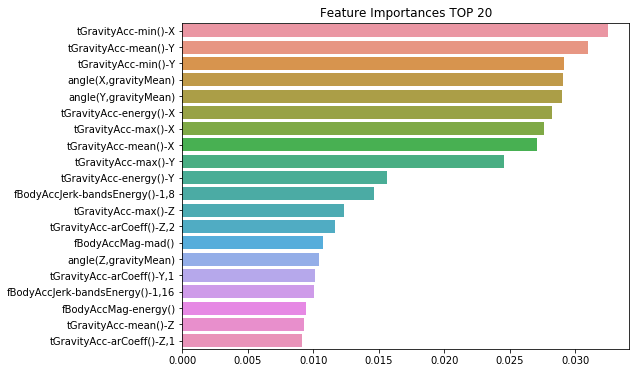

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values= rf_clf1.feature_importances_
ftr_importances= pd.Series( ftr_importances_values, index=X_train.columns)
ftr_top20= ftr_importances.sort_values(ascending=False)[:20]

plt.figure( figsize=(8,6))
plt.title('Feature Importances TOP 20')
sns.barplot( x=ftr_top20, y=ftr_top20.index)
plt.show()